In [4]:
import indra
from indra.sources import bel
from indra.sources import trips
from indra.sources import reach
from indra import statements
from indra.assemblers.pysb import PysbAssembler
import networkx as nx

#### Using REACH extractor for processing the article

In [39]:
reach_processor = trips.process_pmc('PMC8348050')

AttributeError: module 'indra.sources.trips' has no attribute 'process_pmc'

In [7]:
#[i.evidence[0].text for i in reach_processor.statements]

#### Using SBGN Assembler

In [8]:
from indra.assemblers.sbgn.assembler import SBGNAssembler

In [9]:
sbgn_ass  = SBGNAssembler(statements=reach_processor.statements)
sbgn = sbgn_ass.make_model()

In [12]:
### saving SBGN model
sbgn_ass.save_model("sbgmodel.sbgn")

**Cannot visulaize the SBGN model**

#### Using Natural language assembler

In [22]:
from indra.assemblers.english.assembler import EnglishAssembler
Eng_ass  = EnglishAssembler(stmts=reach_processor.statements,)
Eng = Eng_ass.make_model()

In [26]:
Eng ### model in Natural language

'PPP3 leads to the phosphorylation of NFATC1. Receptors binds self-major histocompatibility complex. CD40 receptors binds CD40LG. CD40 binds CD40LG. Antigen binds CD3D. Fc receptor activates inflammatory response. Gluten activates immune response. IL25 activates Th2. Prostaglandin D2 activates Neoplasm Invasiveness. LSM-36909 inhibits cell population proliferation. CD4+ inhibits TH. IL10 inhibits TH. Phenol inhibits DNA Damage. Nickel(2+) inhibits inflammatory response. Nickel(2+) inhibits apoptotic process. Acrolein inhibits c-Jun. Methylated PAH activates calcium atom. 17alpha-ethynylestradiol inhibits NELFCD. EDCs inhibits NELFCD. APCS activates ENG. Tributylstannane inhibits IL12. 4-octylphenol inhibits IL12. Chloride inhibits IL12. ERCC8 inhibits IL4. ERCC8 inhibits IFN-ɤ genes. ERCC8 inhibits IL2. Receptor activates signal transduction. Cyclosporin A inhibits lysozyme. TNF-α activates cell adhesion. Arginase activates TNF-α. DAG translocates from the endoplasmic reticulum. Cortic

In [30]:
from indra.assemblers.indranet import IndraNetAssembler
indranet_assembler = IndraNetAssembler(statements=reach_processor.statements,)

In [31]:
indranet = indranet_assembler.make_model()

INFO: [2022-10-06 15:59:54] indra.assemblers.indranet.assembler - Assembling multi_graph model with preassembly method
INFO: [2022-10-06 15:59:54] indra.tools.assemble_corpus - Filtering 32 statements for type Complex...
INFO: [2022-10-06 15:59:54] indra.tools.assemble_corpus - 4 statements after filter...
INFO: [2022-10-06 15:59:54] indra.tools.assemble_corpus - Filtering 32 statements for type Conversion...
INFO: [2022-10-06 15:59:54] indra.tools.assemble_corpus - 0 statements after filter...


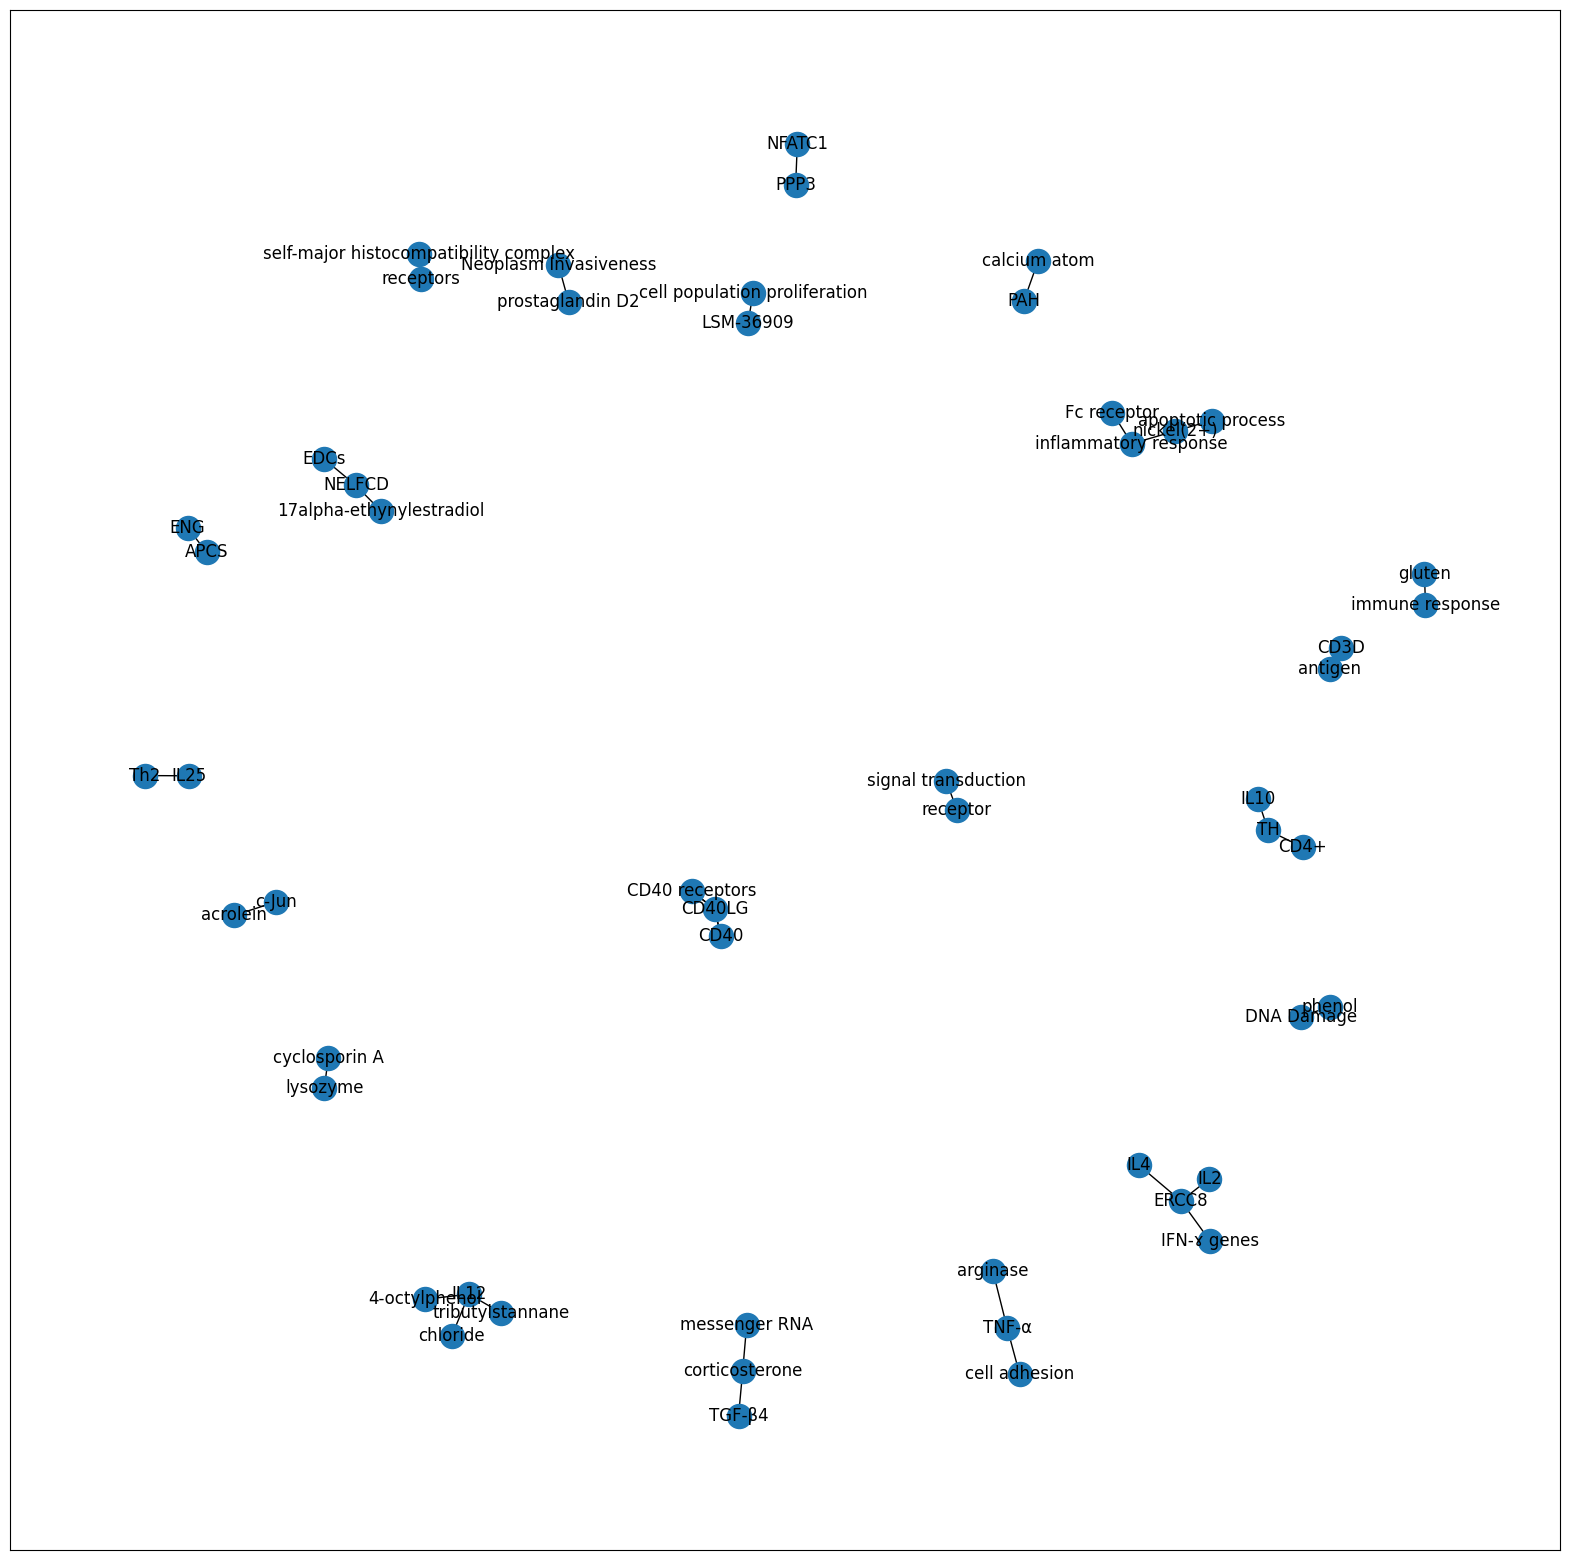

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
nx.draw_networkx(indranet,pos=nx.spring_layout(indranet))
plt.show()

### Creating assembly using Cytoscape assembler

In [33]:
from indra.assemblers.cyjs.assembler import CyJSAssembler
CyJS_Assembler = CyJSAssembler(reach_processor.statements)
CyJS_Assembler.make_model()

'{\n "edges": [\n  {\n   "data": {\n    "i": "Phosphorylation",\n    "id": 2,\n    "polarity": "positive",\n    "source": 0,\n    "target": 1,\n    "uuid_list": [\n     "fdc679f7-0952-469b-b709-4d80cbafda4c"\n    ]\n   }\n  },\n  {\n   "data": {\n    "i": "Complex",\n    "id": 5,\n    "polarity": "none",\n    "source": 3,\n    "target": 4,\n    "uuid_list": [\n     "91ba9ccb-5084-4063-b01e-b8f5423fba9a"\n    ]\n   }\n  },\n  {\n   "data": {\n    "i": "Complex",\n    "id": 8,\n    "polarity": "none",\n    "source": 6,\n    "target": 7,\n    "uuid_list": [\n     "0549f8ae-6de1-43b4-a31d-6e5b7317f656"\n    ]\n   }\n  },\n  {\n   "data": {\n    "i": "Complex",\n    "id": 10,\n    "polarity": "none",\n    "source": 9,\n    "target": 7,\n    "uuid_list": [\n     "b0aa8908-04d0-47c6-b4d4-651502d439a7"\n    ]\n   }\n  },\n  {\n   "data": {\n    "i": "Complex",\n    "id": 13,\n    "polarity": "none",\n    "source": 11,\n    "target": 12,\n    "uuid_list": [\n     "1bd90980-af9c-4727-8b69-dcdbd5

In [34]:
### saving model in json format for visualization in cytoscape library
CyJS_Assembler.save_model("test")
CyJS_Assembler.save_json("model")

#### Creating Table assembler

In [36]:
from indra.assemblers.tsv.assembler import TsvAssembler

In [38]:
tsv_ass = TsvAssembler(reach_processor.statements)
tsv_ass.make_model("Table_model")